In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data_set = datasets.MNIST(root='/Users/tarunupputuri/Downloads/DeepLearning/Homework_1', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='/Users/tarunupputuri/Downloads/DeepLearning/Homework_1', train=False, download=True, transform=transform)

In [4]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/tarunupputuri/Downloads/DeepLearning/Homework_1
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/tarunupputuri/Downloads/DeepLearning/Homework_1
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_loader = DataLoader(train_data_set, batch_size=500, shuffle=True)

test_loader = DataLoader(test_data_set, batch_size=100, shuffle=False)

In [7]:
# Calculating number of parameters in the class
def CalcParams(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

In [8]:
#Model1 with 1645 parameters
class Model1(nn.Module):
    def __init__(self, in_features=784, h1=2, h2=5, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [9]:
model1=Model1()

In [10]:
model1

Model1(
  (fc1): Linear(in_features=784, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=10, bias=True)
)

In [11]:

model1params=CalcParams(model1)
print(model1params)

1645


In [12]:
criterion1 = nn.CrossEntropyLoss()

In [13]:
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [14]:
epochs = 50
train_correct_mod1 = []
test_correct_mod1 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        y_pred = model1(X_train.view(500, -1))  
        loss = criterion1(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1=loss
    train_correct_mod1.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model1(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion1(y_val, y_test)
    test_losses_mod1=(loss)
    test_correct_mod1.append(test_corr)
    
        

In [15]:
train_losses_mod1= train_losses_mod1.detach().numpy()


In [16]:
 for t in train_correct_mod1:
    trn_accu_mod1=t/600
    
print(trn_accu_mod1)

tensor(67.9883)


In [17]:
 for t in test_correct_mod1:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(68.1100)


In [ ]:
#######################################----------Model-2------------#####################################################################

In [18]:
#Model2 with 3240parameters
class Model2(nn.Module):
    def __init__(self, in_features=784, h1=4, h2=6, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [19]:
model2=Model2()

In [20]:
model2

Model2(
  (fc1): Linear(in_features=784, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=10, bias=True)
)

In [21]:
model2params=CalcParams(model2)
print(model2params)

3240


In [22]:
criterion2 = nn.CrossEntropyLoss()

In [23]:
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [24]:
epochs = 50
train_correct_mod2 = []
test_correct_mod2 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model2(X_train.view(500, -1))  
        loss = criterion2(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        
              
        # Update parameters
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        
#     print(train_corr.item()*100/(100*b))
    # Update train loss & accuracy for the epoch
    train_losses_mod2=loss
    train_correct_mod2.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model2(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion2(y_val, y_test)
    test_losses_mod2=(loss)
    test_correct_mod2.append(test_corr)
        

In [25]:
train_losses_mod2= train_losses_mod2.detach().numpy()

In [26]:
for t in train_correct_mod2:
    trn_accu_mod2=t/600
    
print(trn_accu_mod2)

tensor(88.3683)


In [27]:
 for t in test_correct_mod2:
    tst_accu_mod2=t/100
    
print(tst_accu_mod2)

tensor(87.7700)


In [ ]:
#######################################----------Model-3------------#####################################################################

In [28]:
#Model3 with 8280 parameters
class Model3(nn.Module):
    def __init__(self, in_features=784, h1=10, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [29]:
model3=Model3()

In [30]:
model3

Model3(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [31]:
model3params=CalcParams(model3)
print(model3params)

8280


In [32]:
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.001)

In [33]:
epochs = 50
train_correct_mod3 = []
test_correct_mod3 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model3(X_train.view(500, -1))  
        loss = criterion3(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer3.zero_grad()
        loss.backward()
        optimizer3.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod3=loss
    train_correct_mod3.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model3(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion3(y_val, y_test)
    test_losses_mod3=loss
    test_correct_mod3.append(test_corr)
        

In [34]:
train_losses_mod3= train_losses_mod3.detach().numpy()

In [35]:
for t in train_correct_mod3:
    trn_accu_mod3=t/600
    
print(trn_accu_mod3)

tensor(95.2400)


In [36]:
for t in test_correct_mod3:
    tst_accu_mod3=t/100
    
print(tst_accu_mod3)

tensor(94.5000)


In [ ]:
#######################################----------Model-4------------#####################################################################

In [37]:
#Model4 with 16950 parameters
class Model4(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [38]:
model4=Model4()

In [39]:
model4

Model4(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=40, bias=True)
  (out): Linear(in_features=40, out_features=10, bias=True)
)

In [40]:
model4params=CalcParams(model4)
print(model4params)

16950


In [41]:
criterion4 = nn.CrossEntropyLoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr=0.001)

In [42]:
epochs = 50
train_correct_mod4 = []
test_correct_mod4 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model4(X_train.view(500, -1))  
        loss = criterion4(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer4.zero_grad()
        loss.backward()
        optimizer4.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod4=loss
    train_correct_mod4.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model4(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion4(y_val, y_test)
    test_losses_mod4=loss
    test_correct_mod4.append(test_corr)
        

In [43]:
train_losses_mod4 = train_losses_mod4.detach().numpy()

In [44]:
for t in train_correct_mod4:
    trn_accu_mod4=t/600
    
print(trn_accu_mod4)

tensor(97.9683)


In [45]:
for t in test_correct_mod4:
    tst_accu_mod4=t/100
    
print(tst_accu_mod4)

tensor(96.0800)


In [ ]:
#######################################----------Model-5------------#####################################################################

In [46]:
#Model5 with 44140 parameters
class Model5(nn.Module):
    def __init__(self, in_features=784, h1=50, h2=80, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [47]:
model5=Model5()

In [48]:
model5

Model5(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=80, bias=True)
  (out): Linear(in_features=80, out_features=10, bias=True)
)

In [49]:
model5params=CalcParams(model5)
print(model5params)

44140


In [50]:
criterion5 = nn.CrossEntropyLoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.001)

In [51]:
epochs = 50
train_correct_mod5 = []
test_correct_mod5 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model5(X_train.view(500, -1))  
        loss = criterion5(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod5=loss
    train_correct_mod5.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model5(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion5(y_val, y_test)
    test_losses_mod5=loss
    test_correct_mod5.append(test_corr)
        

In [52]:
train_losses_mod5 = train_losses_mod5.detach().numpy()

In [53]:
for t in train_correct_mod5:
    trn_accu_mod5=t/600
    
print(trn_accu_mod5)

tensor(99.8067)


In [54]:
for t in test_correct_mod5:
    tst_accu_mod5=t/100
    
print(tst_accu_mod5)

tensor(97.1100)


In [ ]:
#######################################----------Model-6------------#####################################################################

In [55]:
#Model6 with 44140 parameters
class Model6(nn.Module):
    def __init__(self, in_features=784, h1=100, h2=120, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [56]:
model6=Model6()

In [57]:
model6

Model6(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=120, bias=True)
  (out): Linear(in_features=120, out_features=10, bias=True)
)

In [58]:
model6params=CalcParams(model6)
print(model6params)

91830


In [59]:
criterion6 = nn.CrossEntropyLoss()
optimizer6 = torch.optim.Adam(model6.parameters(), lr=0.001)

In [60]:
epochs = 50
train_correct_mod6 = []
test_correct_mod6 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model6(X_train.view(500, -1))  
        loss = criterion6(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer6.zero_grad()
        loss.backward()
        optimizer6.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod6=loss
    train_correct_mod6.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model6(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion6(y_val, y_test)
    test_losses_mod6=loss
    test_correct_mod6.append(test_corr)
        

In [61]:
train_losses_mod6 = train_losses_mod6.detach().numpy()

In [62]:
for t in train_correct_mod6:
    trn_accu_mod6=t/600
    
print(trn_accu_mod6)

tensor(100.)


In [63]:
for t in test_correct_mod6:
    tst_accu_mod6=t/100
    
print(tst_accu_mod6)

tensor(97.7700)


In [ ]:
#######################################----------Model-7------------#####################################################################

In [64]:
#Model7 with 160410 parameters
class Model7(nn.Module):
    def __init__(self, in_features=784, h1=180, h2=100, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [65]:
model7=Model7()

In [66]:
model7

Model7(
  (fc1): Linear(in_features=784, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [67]:
model7params=CalcParams(model7)
print(model7params)

160410


In [68]:
criterion7 = nn.CrossEntropyLoss()
optimizer7 = torch.optim.Adam(model7.parameters(), lr=0.001)

In [69]:
epochs = 50
train_correct_mod7 = []
test_correct_mod7 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model7(X_train.view(500, -1))  
        loss = criterion7(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer7.zero_grad()
        loss.backward()
        optimizer7.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod7=loss
    train_correct_mod7.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model7(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion7(y_val, y_test)
    test_losses_mod7=loss
    test_correct_mod7.append(test_corr)
        

In [70]:
train_losses_mod7 = train_losses_mod7.detach().numpy()

In [71]:
for t in train_correct_mod7:
    trn_accu_mod7=t/600
    
print(trn_accu_mod7)

tensor(100.)


In [72]:
for t in test_correct_mod7:
    tst_accu_mod7=t/100
    
print(tst_accu_mod7)

tensor(97.8300)


In [ ]:
#######################################----------Model-8------------#####################################################################

In [73]:
#Model8 with 396210 parameters
class Model8(nn.Module):
    def __init__(self, in_features=784, h1=400, h2=200, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [74]:
model8=Model8()

In [75]:
model8

Model8(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (out): Linear(in_features=200, out_features=10, bias=True)
)

In [76]:
model8params=CalcParams(model8)
print(model8params)

396210


In [77]:
criterion8 = nn.CrossEntropyLoss()
optimizer8 = torch.optim.Adam(model8.parameters(), lr=0.001)

In [78]:
epochs = 50
train_correct_mod8 = []
test_correct_mod8 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
       
        y_pred = model8(X_train.view(500, -1))  
        loss = criterion8(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer8.zero_grad()
        loss.backward()
        optimizer8.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod8=loss
    train_correct_mod8.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model8(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion8(y_val, y_test)
    test_losses_mod8=loss
    test_correct_mod8.append(test_corr)
        

In [79]:
train_losses_mod8 = train_losses_mod8.detach().numpy()

In [80]:
for t in train_correct_mod8:
    trn_accu_mod8=t/600
    
print(trn_accu_mod8)

tensor(100.)


In [81]:
for t in test_correct_mod8:
    tst_accu_mod8=t/100
    
print(tst_accu_mod8)

tensor(98.1200)


In [ ]:
#######################################----------Model-9------------#####################################################################

In [82]:
#Model9 with 654310 parameters
class Model9(nn.Module):
    def __init__(self, in_features=784, h1=600, h2=300, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [83]:
model9=Model9()

In [84]:
model9

Model9(
  (fc1): Linear(in_features=784, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=300, bias=True)
  (out): Linear(in_features=300, out_features=10, bias=True)
)

In [85]:
model9params=CalcParams(model9)
print(model9params)

654310


In [86]:
criterion9 = nn.CrossEntropyLoss()
optimizer9 = torch.optim.Adam(model9.parameters(), lr=0.001)

In [87]:
epochs = 50
train_correct_mod9 = []
test_correct_mod9 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
     
        y_pred = model9(X_train.view(500, -1))  
        loss = criterion9(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer9.zero_grad()
        loss.backward()
        optimizer9.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod9=loss
    train_correct_mod9.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model9(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion9(y_val, y_test)
    test_losses_mod9=loss
    test_correct_mod9.append(test_corr)
        

In [88]:
train_losses_mod9 = train_losses_mod9.detach().numpy()

In [89]:
for t in train_correct_mod9:
    trn_accu_mod9=t/600
    
print(trn_accu_mod9)

tensor(100.)


In [90]:
for t in test_correct_mod9:
    tst_accu_mod9=t/100
    
print(tst_accu_mod9)

tensor(98.2700)


In [ ]:
#######################################----------Model-10------------#####################################################################

In [91]:
#Model10 with 952410 parameters
class Model10(nn.Module):
    def __init__(self, in_features=784, h1=800, h2=400, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [92]:
model10=Model10()

In [93]:
model10

Model10(
  (fc1): Linear(in_features=784, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=400, bias=True)
  (out): Linear(in_features=400, out_features=10, bias=True)
)

In [94]:
model10params=CalcParams(model10)
print(model10params)

952410


In [95]:
criterion10 = nn.CrossEntropyLoss()
optimizer10 = torch.optim.Adam(model10.parameters(), lr=0.001)

In [96]:
epochs = 50
train_correct_mod10 = []
test_correct_mod10 = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
      
        y_pred = model10(X_train.view(500, -1))  
        loss = criterion10(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer10.zero_grad()
        loss.backward()
        optimizer10.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod10=loss
    train_correct_mod10.append(train_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model10(X_test.view(100, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion10(y_val, y_test)
    test_losses_mod10=loss
    test_correct_mod10.append(test_corr)
        

In [97]:
train_losses_mod10 = train_losses_mod10.detach().numpy()

In [98]:
for t in train_correct_mod10:
    trn_accu_mod10=t/600
    
print(trn_accu_mod10)

tensor(100.)


In [99]:
for t in test_correct_mod10:
    tst_accu_mod10=t/100
    
print(tst_accu_mod10)

tensor(98.3500)


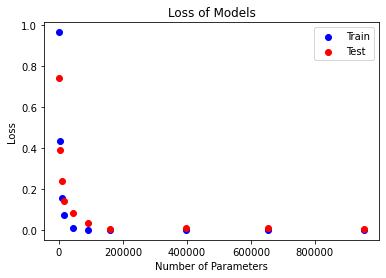

In [100]:
#Training Loss
plt.scatter(model1params, train_losses_mod1,c='b',label='Train')
plt.scatter(model2params, train_losses_mod2,c='b')
plt.scatter(model3params, train_losses_mod3,c='b')
plt.scatter(model4params, train_losses_mod4,c='b')
plt.scatter(model5params, train_losses_mod5,c='b')
plt.scatter(model6params, train_losses_mod6,c='b')
plt.scatter(model7params, train_losses_mod7,c='b')
plt.scatter(model8params, train_losses_mod8,c='b')
plt.scatter(model9params, train_losses_mod9,c='b')
plt.scatter(model10params, train_losses_mod10,c='b')

#Testing Loss

plt.scatter(model1params, test_losses_mod1,c='r',label='Test')
plt.scatter(model2params, test_losses_mod2,c='r')
plt.scatter(model3params, test_losses_mod3,c='r')
plt.scatter(model4params, test_losses_mod4,c='r')
plt.scatter(model5params, test_losses_mod5,c='r')
plt.scatter(model6params, test_losses_mod6,c='r')
plt.scatter(model7params, test_losses_mod7,c='r')
plt.scatter(model8params, test_losses_mod8,c='r')
plt.scatter(model9params, test_losses_mod9,c='r')
plt.scatter(model10params, test_losses_mod10,c='r')

plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

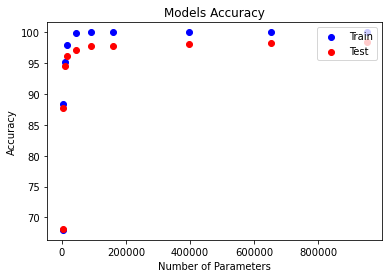

In [101]:
#Training Accuracy
plt.scatter(model1params, trn_accu_mod1,c='b',label='Train')
plt.scatter(model2params, trn_accu_mod2,c='b')
plt.scatter(model3params, trn_accu_mod3,c='b')
plt.scatter(model4params, trn_accu_mod4,c='b')
plt.scatter(model5params, trn_accu_mod5,c='b')
plt.scatter(model6params, trn_accu_mod6,c='b')
plt.scatter(model7params, trn_accu_mod7,c='b')
plt.scatter(model8params, trn_accu_mod8,c='b')
plt.scatter(model9params, trn_accu_mod9,c='b')
plt.scatter(model10params, trn_accu_mod10,c='b')

#Testing Accuracy

plt.scatter(model1params, tst_accu_mod1,c='r',label='Test')
plt.scatter(model2params, tst_accu_mod2,c='r')
plt.scatter(model3params, tst_accu_mod3,c='r')
plt.scatter(model4params, tst_accu_mod4,c='r')
plt.scatter(model5params, tst_accu_mod5,c='r')
plt.scatter(model6params, tst_accu_mod6,c='r')
plt.scatter(model7params, tst_accu_mod7,c='r')
plt.scatter(model8params, tst_accu_mod8,c='r')
plt.scatter(model9params, tst_accu_mod9,c='r')
plt.scatter(model10params, tst_accu_mod10,c='r')

plt.title("Models Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()